In [1]:
## Importing data file

import numpy as np
import matplotlib.pyplot as plt

data = np.load('strat_wealth_vs_lambda.npz')

rc_ar = data['rc_ar']
pd_ar = data['pd_ar']
rd_ar = data['rd_ar']
pc_ar = data['pc_ar']

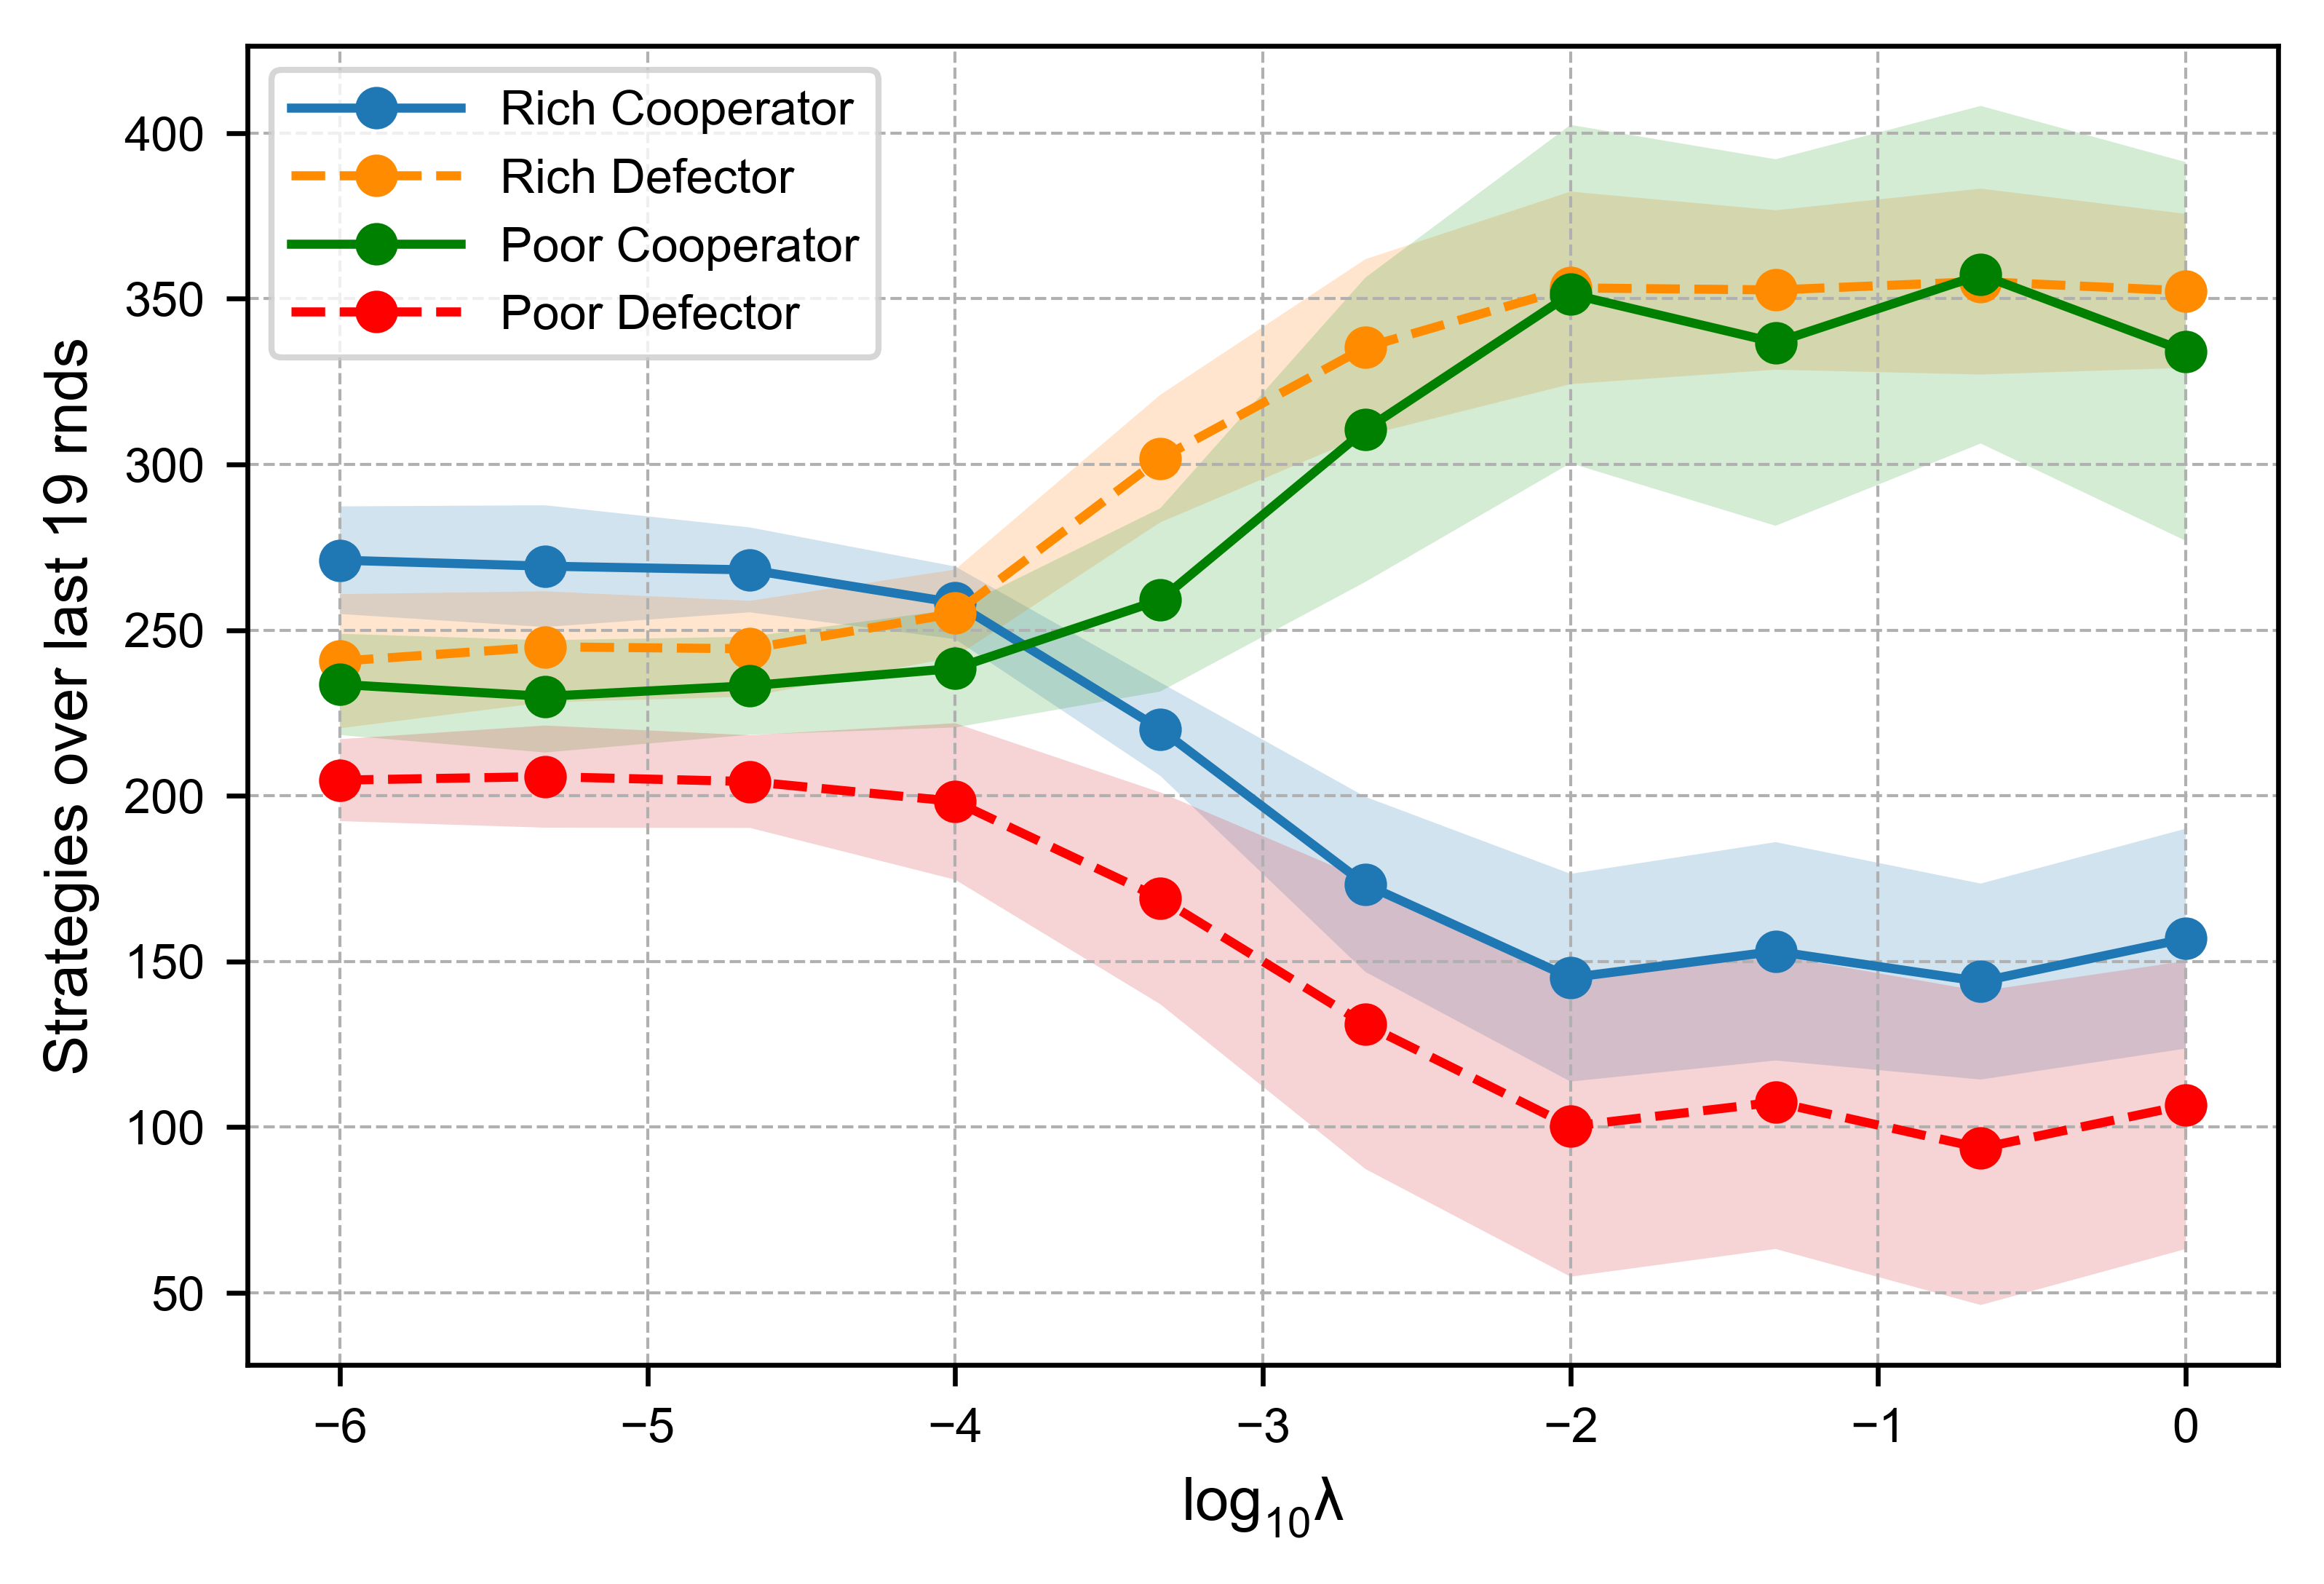

In [7]:
## Plotting Wealth+Strategy vs lambda

lam_ar = np.logspace(-6,0,num=10,endpoint=True)
x=np.log10(lam_ar)
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

y1=np.mean(rc_ar,1)
z1=np.std(rc_ar,1)

y2=np.mean(pd_ar,1)
z2=np.std(pd_ar,1)

y3=np.mean(rd_ar,1)
z3=np.std(rd_ar,1)

y4=np.mean(pc_ar,1)
z4=np.std(pc_ar,1)

from matplotlib.pyplot import figure

fig,ax = plt.subplots(figsize=(6, 4), dpi=600, facecolor='w', edgecolor='k')

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel('Strategies over last 19 rnds', fontsize=10)
plt.xlabel('log$_{10}\lambda$', fontname = 'Arial', fontsize=10)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

#plt.title('N = 50, Runs = 50, $\lambda=0.001$, Initial GINI: 0.2', fontsize=8, pad='10')
ax.plot(x,y1,'-o',label='Rich Cooperator')
ax.fill_between(x, y1 - z1, y1 + z1, alpha=0.2)

ax.plot(x,y3,'--o',color='darkorange',linestyle='dashed',label='Rich Defector')
ax.fill_between(x, y3 - z3, y3 + z3, alpha=0.2)

ax.plot(x,y4,'-o',color='g',label='Poor Cooperator')
ax.fill_between(x, y4 - z4, y4 + z4, alpha=0.2)

ax.plot(x,y2,'--o',color='r',linestyle='dashed',label='Poor Defector')
ax.fill_between(x, y2 - z2, y2 + z2, alpha=0.2)

plt.grid(1,'major',linestyle='--', linewidth=0.5)
plt.legend(handlelength=3.5, fontsize=8, loc="upper left")
plt.savefig('strategy_vs_lambda.png',format='png',quality=95,dpi=300)